<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/05.00.Aula-Qualidade_e_comparacao_de_modelos.slides.html"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Modelos compartimentais estruturados](04.00.Aula-Compartimentais_estruturados.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelos baseados em indivíduos e o relatório do Imperial Colege ->](06.00.Aula-Modelos_baseados_em_individuos.ipynb)

---


# Qualidade e comparação de modelos

- Erros absolutos SS e RMS
- Erros relativos baseados em SS e RMS
- R-quadrado
- R-quadrado ajustado
- Validação cruzada
- Validação cruzada com dobras
- AIC
- AICc
- BIC

## Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
import datetime as dt # date and time tools

from collections import namedtuple

from os import path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sns.set_style("darkgrid")

In [3]:
dt_string = dt.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 18/Apr/2020


## Amostra e modelo

Consideramos 

- Uma **amostra** $ (x_i, y_i), i=1, \ldots, N$. 

- Um **modelo** $y = f_\beta(x),$ com **parâmetros** $\beta=(\beta_1, \ldots, \beta_m)$.

- **Valores calculados pelo modelo:** $\hat y_i = f_\beta(x_i).$

- **Dados modelados:** $ (x_i, \hat y_i), i = 1, \ldots, N.$

## Resíduos

Os resíduos são dados pelas diferenças entre os dados da amostra e os do modelo:

$$ r_i = f_\beta(x_i) - y_i.
$$

ou, com a notação $\hat y_i = f(x_i)$,

$$ r_i = \hat y_i - y_i.
$$

## Erros absolutos SS e RMS

Duas maneiras naturais, e relacionadas, de calcular o erro de um modelo são:

- **SS dos resíduos** ou **soma dos quadrados dos resíduos** (sum of squares of residuals):

$$ \mathrm{SS}(r_i) = \sum_{i=1}^N r_i^2 = \sum_i (\hat y_i - y_i)^2.
$$

- **RMS dos resíduos**  ou **raiz quadrada da média dos quadrados dos resíduos** (root-mean-square of the residuals):

$$ \mathrm{RMS}(r_i) = \sqrt{\frac{1}{N} \sum_{i=1}^N r_i^2} = \sqrt{\frac{1}{N} \sum_{i=1}^N(\hat y_i - y_i)^2}.
$$

**Observações:**

- Estes são erros **absolutos** do modelo.

- $\mathrm{SS}(r_i)$ depende "fortemente" do número de dados e pode crescer significativamente à medida em que os dados aumentam em número (apesar disso poder levar, em certo sentido, a melhorias no modelo).

- Temos 

$$  \mathrm{RMS}(r_i) = \sqrt{\frac{\mathrm{SS}}{N}}.
$$

## Erros relativos

Erros relativos podem ser obtidos dividindo os erros absolutos por alguma grandeza dos dados. No caso, podemos considerar

- **SS relativo:**

$$ \mathrm{SS}_\textrm{rel} = \frac{\mathrm{SS}(r_i)}{\mathrm{SS}(y_i)},
$$

onde $\mathrm{SS}(y_i) = \sum_i y_i^2$.

- **RMS relativo dos resíduos**:

$$ \mathrm{RMS}_\textrm{rel} = \frac{\mathrm{RMS}(r_i)}{\mathrm{RMS}(y_i)},
$$

onde $\mathrm{RMS}(y_i) = \sqrt{(1/N)\sum_i y_i^2}$.

**Observações:**

- É claro que os denominadores não podem se anular, mas eles so se anulam quando $y_i=0$, sendo que, nesse caso, não há muito o que modelar.

- O denominador envolve a média dos valores da amostra, que pode ser visto como a melhor aproximação constante do modelo. 

- $\mathrm{SS}_\textrm{rel}$ não depende "tão fortemente" do número de amostras. 

- A relação entre $\mathrm{SS}_\textrm{rel}$ e  $\mathrm{RMS}_\textrm{rel}$ não dependem mais, explicitamente, do número de amostras:

$$ \mathrm{SS}_\textrm{rel} = \mathrm{RMS}_\textrm{rel}^2.
$$

- Como $\mathrm{RMS}$ tem a mesma grandeza que os valores (e.g. comprimento, velocidade, massa, população, moeda), ela é mais natural para expressar o erro relativo.

- Por exemplo, se $\mathrm{RMS}_\textrm{rel} \approx 0.1$, podemos dizer que o modelo nos dá uma aproximação de 10% dos dados da amostra.

## R-quadrado

Uma outra quantidade relativa usada para medir a qualidade de um modelo é o chamado **R quadrado**, baseado diretamente na soma dos quadrados dos resíduos $\mathrm{SS}(r_i)$. Considera-se

- A **média dos valores dos dados** da amostra:

$$ \bar y = \frac{1}{N} \sum_{i=1}^N y_i.
$$

- **Soma dos quadrados total** (que é proporcional à variância total):

$$ \mathrm{SS}_\text{tot} = \sum_{i=1}^N (y_i - \bar y)^2 = N \mathrm{Var}(y_i).
$$

- **Soma dos quadrado da regressão:**

$$ \mathrm{SS}_\text{reg} = \sum_{i=1}^N (\hat y_i - \bar y)^2.
$$

- **R-quadrado:**

$$ R^2 = \frac{\mathrm{SS}_\text{reg}}{\mathrm{SS}_\text{tot}}.
$$

## R-quadrado em regressão via mínimos quadrados

Quando a modelagem é feita via mínimos quadrados, vale a relação

$$ \mathrm{SS}_\text{reg} = \mathrm{SS}_\text{tot} - \mathrm{SS}_\text{res},
$$

o que nos leva à formula vista anteriormente:

$$ R^2 = 1 - \frac{\mathrm{SS}_\text{res}}{\mathrm{SS}_\text{tot}}.
$$

## Comparando diferentes modelos

- Uma primeira medida de comparação entre diferentes modelos é comparar os valores correspondentes de algumas das quantidade vistas acima:

    - RMS absoluto
    
    - RMS relativo
    
    - SS relativo
    
    - R-quadrado
    
- A medida SS absoluta não é apropriada porque depende fortemente do número de dados.

- A dependência dessas medidas em relação ao número de parâmetros também é um ponto delicada.

## R-quadrado ajustado

- Nesse caso, temos um ajuste em relação ao número de parâmetros do modelo:

$$ \bar R^2 = 1 - (1-R^2)\frac{N-1}{N-k},
$$

onde $N$ é o número de dados e $k$ é o número de parâmetros.

## Validação cruzada

- O objetivo aqui não é apenas achar os parâmetros do modelo que melhor se ajustam aos dados, mas verificar se ele é um bom modelo para fazer previsões/predições.

- A ideia é separar parte dos dados para o ajuste (treino) e o restante para validação (teste).

- Separações típicas são da ordem de 75% dos dados para o ajuste e 25% para teste.

- Compara-se o RMS do ajuste com o RMS do teste:

    - Se o RMS do teste estiver próximo do RMS do ajuste, considera-se que o modelo tem boa capacidade de previsão.

    - Se o RMS do teste for muito maior, o modelo não tem boa capacidade de previsão.

## Validação cruzada com dobras *(k-fold cross-validation)*

- Nesse caso, a ideia é fazer várias validações cruzadas.

- Divide-se os dados em $J$ partes iguais (chamadas dobras, ou *folds*), digamos, $J=5$ ou $10$.

- Em cada uma de $J$ etapas, seleciona-se 1 das dobras para teste e as outras $J-1$ para o ajuste.

- Ao final, temos $J$ conjuntos $\beta^{j}$ de parâmetros, cada um como melhor ajuste baseado nos seus dados de treino, assim como $J$ valores de RMS do ajuste e $J$ de RMS do teste.

- Se os valores dos parâmetros, nas diferentes dobras, estiverem próximos uns dos outros, isso é um indicativo da **estabilidade** do modelo.

- Ao final, se o modelo for estável, podemos selecionar os parâmetros de várias formas:

    - Fazendo um novo ajuste com todos os dados;
    
    - Tomando uma média, entre as várias dobras, de cada parâmetro; ou
    
    - Selecionado uma ou tomando uma média entre algumas dobras dentre as mais estáveis e com melhor qualidade preditiva.
    
- O erro RMS da validação cruzada é o RMS dos erros de cada dobra 

$$ \epsilon = \sqrt{\frac{1}{J}\sum_j \epsilon_j}.
$$

## Critério de AIC

- O critério de informação de Akaike *(Akaike Information Criteria)* é uma medida relativa da qualidade do ajuste.

- Ele penaliza modelos com muitos parâmetros.

- Entre modelos com RMS próximos, o critério ajuda a selecionar o que tem menos parâmetros (menos custoso).

- É definido por

$$ \mathrm{AIC} = N\ln E_k + 2(k+1),
$$

onde $E_k$ é o **erro quadrático médio** do modelo com $k$ parâmetros:

$$ E_k = \frac{1}{N}\sum_{j=1}^N (\hat y_j - y_j)^2 = \mathrm{RMS}_k(r_j)^2 = \frac{\mathrm{SS}_k(r_i)}{N},
$$

- É comum vermos escrito na forma

$$ \mathrm{AIC} = N\ln\left(\frac{\mathrm{SS}_k(r_i)}{N}\right) + 2(k+1).
$$


## AIC corrigido

- O critério AIC vem de Teoria da Informação:

    - Assumindo que os dados são gerados por um certo processo $\mathcal{P}$ desconhecido;
    
    - E que há $J$ candidatos $\mathcal{M_j}$, $j=1, \ldots, N$, há modelos do processo;
    
    - $\mathrm{AIC}_j$ é uma medida da perda de informação obtida usando-se o modelo $j$;
    
    - O modelo com o menor AIC é o modelo com a menor perda de informação.
    
- Mas, como tal, ele vem de um resultado assintótico e é mais utilizado quando há um número relativamente grande de dados, da ordem de

$$ \frac{N}{K} \gtrsim 40,
$$

onde $K=\max k$ é o número de parâmetros do modelo com mais parâmetros dentre os modelos considerados

- Caso não haja dados suficientes, utiliza-se o **AIC corrigido:**

$$ \mathrm{AICc} = N\ln\left(\frac{\mathrm{SS}_k(r_i)}{N}\right) + 2(k+1) + \frac{2(k+1)(k+2)}{n-k-1}.
$$

## BIC (Bayesian Information Criteria)

Este é um outro critério muito próximo do AIC e é definido por

$$ \mathrm{BIC} = N\ln(E_k) + (k+1)\ln(N).
$$

## Exemplo

### Exemplo sintético

Neste exemplo sintético, vamos 

- Considerar um polinômio de grau três

- Construir dados sintéticos a partir de perturbações aleatórias em torno deste polinômio.

- Perturbações uniformemente distribuídas entre $\pm 0.3$ na abscissa.

- Perturbações uniformemente distribuídas entre $\pm 1$ na ordenada.

- Em seguida, usaremos mínimos quadrados para ajustar um polinômio de grau três.

- Posteriormente, mínimos quadrados para ajustar polinômios de diversos graus.

In [4]:
def f_model(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [5]:
def f_data(x,a,b,c,d):
    return np.exp(a*x)*(a*x**3 + b*x**2 + c*np.sin(x) + d)

In [6]:
a, b, c, d = 0.05, -0.45, 0.5, 5.2
x = np.linspace(-1,10, 120)
y2 = f_model(x, a, b, c, d)
a, b, c, d = 0.048, -0.45, 0.4, 7
y = f_data(x, a, b, c, d)

#(x+1)(x-4)(x-6)/20 + 3= (x^2 -3x+4)(x-6) = (x^3 -9x^2 +4x -24)/20 = 0.05x^3 - 0.45x^2 - 0.2x - 1.2 + 4

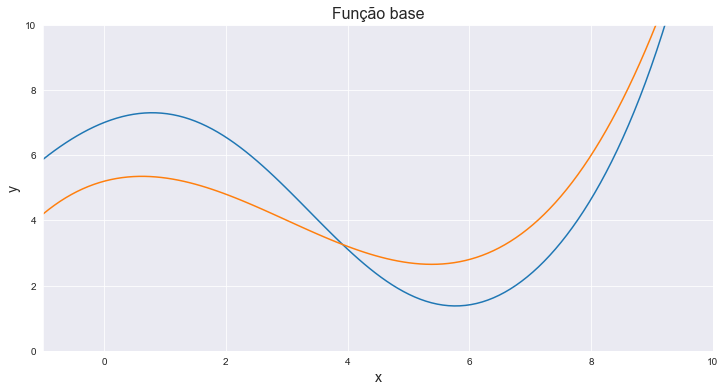

In [7]:
plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1, 10])
plt.ylim([0, 10])
plt.title('Função base', fontsize=16)
plt.show()

## Criando uma função de análise

In [8]:
AnaliseAjuste = namedtuple('AnaliseAjuste', ['residuos', 'rms', 'rms_rel', 'ss', 'ss_rel',
                                             'rsq', 'rsq_org', 'rsq_aj', 
                                            ])

def analise_ajuste(x, y, y_hat={}, model_fun=None, model_args={}):
    if not len(y_hat):
        y_hat = model_fun(x, *model_args)
    
    N = y.size
    y_mean = np.mean(y)
    residuos = y_hat - y
    ss = np.vdot(residuos, residuos) # twice faster than np.linalg.norm
    rms = np.sqrt(ss/N)
    ss_y = np.vdot(y, y)
    rms_y = np.sqrt(ss_y/N)
    if np.isclose(ss_y, 0):
        ss_rel = np.NaN
        rms_rel = np.NaN
    else:
        ss_rel = ss/ss_y
        rms_rel = np.sqrt(ss_rel)

    ss_tot = N*np.var(y)
    rsq = 1 - ss/ss_tot
    ss_reg = np.vdot(y_hat - y_mean, y_hat - y_mean)
    rsq_org = ss_reg/ss_tot
    if len(model_args):
        k = len(model_args)
        rsq_aj = 1 - (1 - rsq)*(N-1)/(N-k)
    else:
        rsq_aj = None
    
    analise = AnaliseAjuste(residuos, rms, rms_rel, ss, ss_rel, rsq, rsq_org, rsq_aj)

    return analise

# Gerando os dados sintéticos

In [9]:
num_points = 10
np.random.seed(14736122)
# dados em inteiros de 0 a 9 perturbados por +/- 0.1
x_amostra = np.array(range(num_points)) + 0.3*np.random.randn(num_points)
y_amostra = f_data(x_amostra, a, b, c, d) + 1*np.random.randn(num_points)

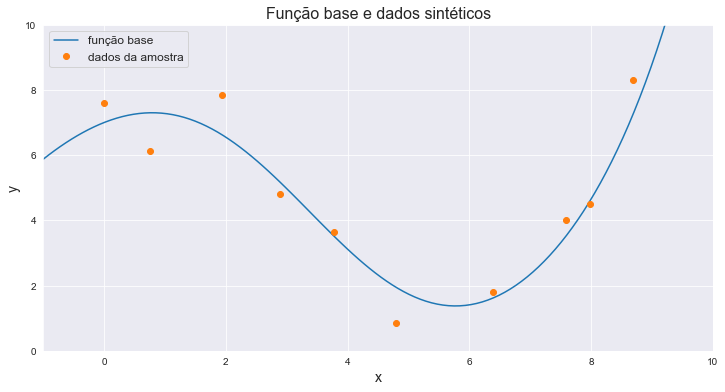

In [10]:
plt.figure(figsize=(12,6))
plt.plot(x, y, label='função base')
plt.plot(x_amostra, y_amostra, 'o', label='dados da amostra')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1, 10])
plt.ylim([0, 10])
plt.legend(fontsize=12)
plt.title('Função base e dados sintéticos', fontsize=16)
plt.show()

## Regressão linear via mínimos quadrados

In [11]:
A_np = np.vstack([x_amostra**3, x_amostra**2, x_amostra,np.ones(len(x_amostra))]).T
beta_hat = np.linalg.lstsq(A_np, y_amostra, rcond=None)[0]
print(beta_hat)

[ 0.08764081 -0.86275888  1.02478083  7.13356471]


In [12]:
y_hat = f_model(x_amostra, *beta_hat)
y_model = f_model(x, *beta_hat)

In [13]:
analise = analise_ajuste(x_amostra, y_amostra, model_fun = f_model, model_args = beta_hat)

## Resultado

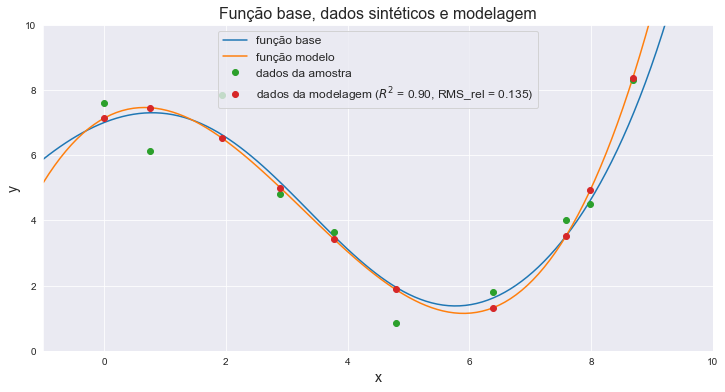

In [14]:
plt.figure(figsize=(12,6))
plt.plot(x, y, label='função base')
plt.plot(x, y_model, label='função modelo')
plt.plot(x_amostra, y_amostra, 'o', label='dados da amostra')
plt.plot(x_amostra, y_hat, 'o', label=f'dados da modelagem ($R^2$ = {analise.rsq:.2f}, RMS_rel = {analise.rms_rel:.3f})')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1, 10])
plt.ylim([0, 10])
plt.legend(fontsize=12)
plt.title('Função base, dados sintéticos e modelagem', fontsize=16)
plt.show()

## Dados da análise

In [15]:
print(f'RMS dos resíduos: {analise.rms:.3f}')
print(f'RMS relativo: {analise.rms_rel:.3f}')
print(f'Baseado no RMS relativo, o modelo nos dá uma aproximação de {100*analise.rms_rel:.01f}% dos dados')
print(f'SS dos resíduos: {analise.ss:.3f}')
print(f'SS relativo: {analise.ss_rel:.3f}')
print(f'R-quadrado: {analise.rsq:.3f}')
print(f'R-quadrado original: {analise.rsq_org:.3f}')
print(f'R-quadrado ajustado: {analise.rsq_aj:.3f}')

RMS dos resíduos: 0.742
RMS relativo: 0.135
Baseado no RMS relativo, o modelo nos dá uma aproximação de 13.5% dos dados
SS dos resíduos: 5.509
SS relativo: 0.018
R-quadrado: 0.904
R-quadrado original: 0.904
R-quadrado ajustado: 0.857


## Aumentando o número de dados

In [16]:
num_points_nova = 20
np.random.seed(14736122)
# dados em inteiros de 0 a 9 perturbados por +/- 0.1
x_nova_amostra = np.array(range(num_points_nova))/2 + 0.3*np.random.randn(num_points_nova)
y_nova_amostra = f_data(x_nova_amostra, a, b, c, d) + 1*np.random.randn(num_points_nova)

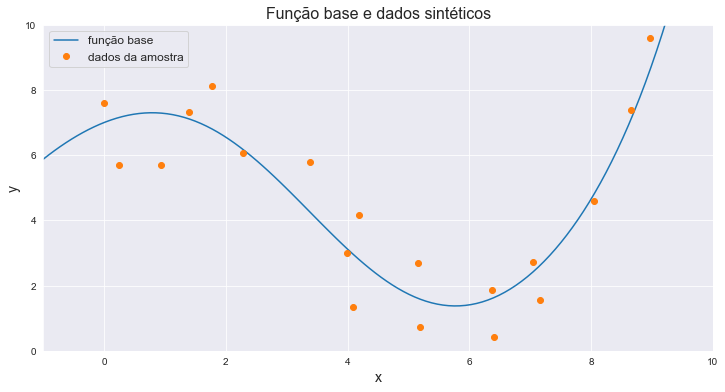

In [17]:
plt.figure(figsize=(12,6))
plt.plot(x, y, label='função base')
plt.plot(x_nova_amostra, y_nova_amostra, 'o', label='dados da amostra')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1, 10])
plt.ylim([0, 10])
plt.legend(fontsize=12)
plt.title('Função base e dados sintéticos', fontsize=16)
plt.show()

## Regressão linear via mínimos quadrados

In [18]:
A_np = np.vstack([x_nova_amostra**3, x_nova_amostra**2, x_nova_amostra,np.ones(len(x_nova_amostra))]).T
beta_hat_nova = np.linalg.lstsq(A_np, y_nova_amostra, rcond=None)[0]
print(beta_hat_nova)

[ 0.07901104 -0.8244182   1.24557628  6.58448253]


In [19]:
y_hat_nova = f_model(x_nova_amostra, *beta_hat_nova)
y_model_nova = f_model(x, *beta_hat_nova)

In [20]:
analise_nova = analise_ajuste(x_nova_amostra, y_nova_amostra, model_fun = f_model, model_args = beta_hat_nova)

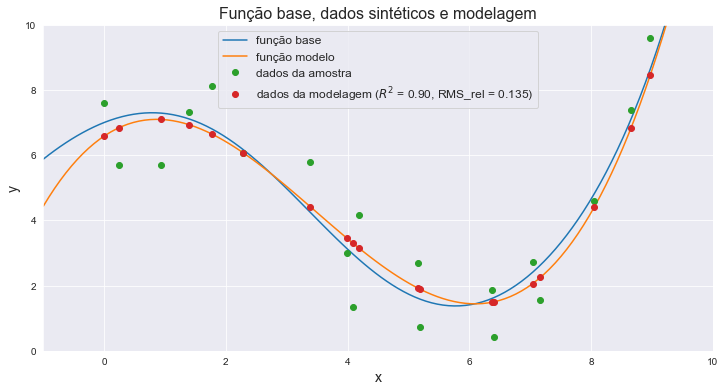

In [21]:
plt.figure(figsize=(12,6))
plt.plot(x, y, label='função base')
plt.plot(x, y_model_nova, label='função modelo')
plt.plot(x_nova_amostra, y_nova_amostra, 'o', label='dados da amostra')
plt.plot(x_nova_amostra, y_hat_nova, 'o', label=f'dados da modelagem ($R^2$ = {analise_nova.rsq:.2f}, RMS_rel = {analise.rms_rel:.3f})')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1, 10])
plt.ylim([0, 10])
plt.legend(fontsize=12)
plt.title('Função base, dados sintéticos e modelagem', fontsize=16)
plt.show()

## Dados da análise

In [22]:
print(f'RMS dos resíduos: {analise_nova.rms:.3f}')
print(f'RMS relativo: {analise_nova.rms_rel:.3f}')
print(f'Baseado no RMS relativo, o modelo nos dá uma aproximação de {100*analise_nova.rms_rel:.01f}% dos dados')
print(f'SS dos resíduos: {analise_nova.ss:.3f}')
print(f'SS relativo: {analise_nova.ss_rel:.3f}')
print(f'R-quadrado: {analise_nova.rsq:.3f}')
print(f'R-quadrado original: {analise_nova.rsq_org:.3f}')
print(f'R-quadrado ajustado: {analise_nova.rsq_aj:.3f}')

RMS dos resíduos: 1.012
RMS relativo: 0.171
Baseado no RMS relativo, o modelo nos dá uma aproximação de 17.1% dos dados
SS dos resíduos: 20.496
SS relativo: 0.029
R-quadrado: 0.901
R-quadrado original: 0.901
R-quadrado ajustado: 0.882


In [77]:
J = len(x_amostra) - 1 
A = [np.array([x_amostra**i for i in range(j, -1, -1)]).T for j in range(J)]
lsq = [np.linalg.lstsq(A[j], y_amostra, rcond=None) for j in range(J)]
coef = [lsq[i][0] for i in range(J)]

In [83]:
err_sel = list()
err_ext = list()
y_sel_ajuste = list()
y_ext_ajuste = list()
for j in range(J):
    y_sel_ajuste.append(np.sum([coef[j][i]*x_amostra**(j-i) for i in range(j+1)], axis=0))    
    if lsq[j][1].size>0:
        err_sel.append(lsq[j][1][0]/len(x_amostra))
    else:
        err_sel.append(np.linalg.norm(y_sel_ajuste[j] - y)**2/len(x_sel)) 
    y_ext_ajuste.append(np.sum([coef[j][i]*x**(j-i) for i in range(j+1)], axis=0))
    err_ext.append(np.linalg.norm(y_ext_ajuste[j] - y)**2/len(x))


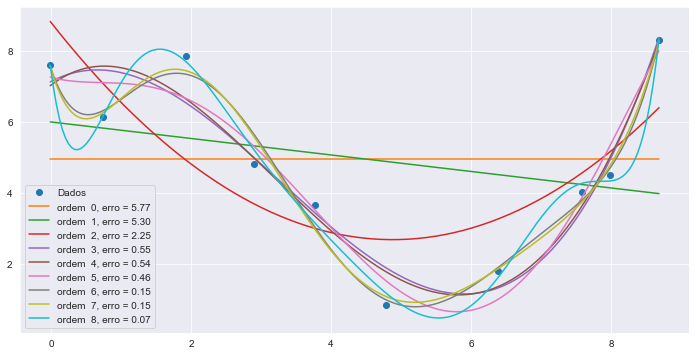

In [86]:
plt.figure(figsize=(12,6))
plt.plot(x_amostra, y_amostra, 'o', label='Dados')
x_ref = np.linspace(x_amostra[0], x_amostra[-1], 200)
y_ref = list()
for j in range(J):
    y_ref.append(np.sum([coef[j][i]*x_ref**(j-i) for i in range(j+1)], axis=0))    
    plt.plot(x_ref, y_ref[j], label=f'ordem  {j}, erro = {err_sel[j]:.2f}')

plt.legend()
plt.show()

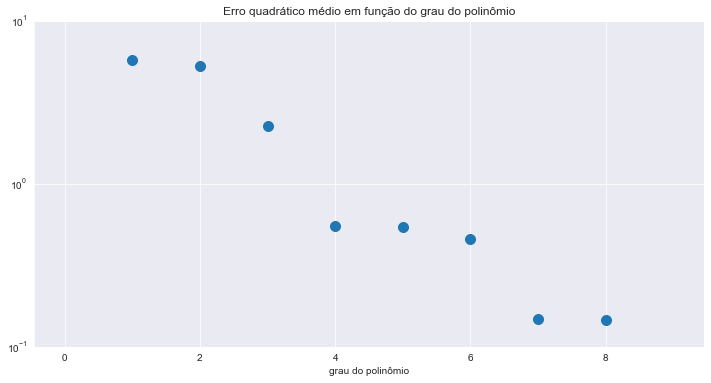

In [92]:
plt.figure(figsize=(12,6))

plt.plot(range(1,len(err_sel)+1), err_sel, 'o', 'r', markersize=10)
plt.grid(True)

plt.yscale('log')
plt.ylim(0.1, 10)
plt.title('Erro quadrático médio em função do grau do polinômio')
plt.xlabel('grau do polinômio')
plt.show()

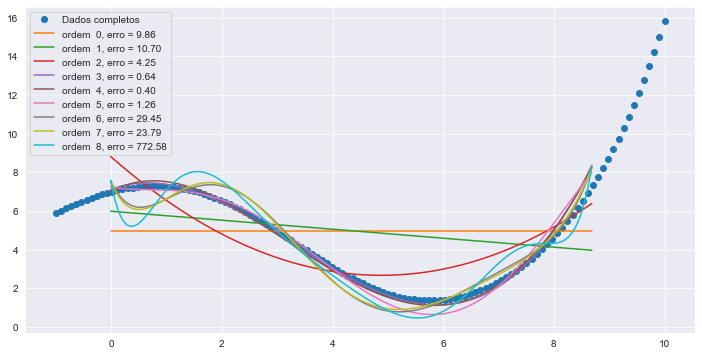

In [94]:
plt.figure(figsize=(12,6))
plt.plot(x, y, 'o', label='Dados completos')
for j in range(J):
    plt.plot(x_ref, y_ref[j], label=f'ordem  {j}, erro = {err_ext[j]:.2f}')
plt.legend()
plt.show()

## Produzindo slide a partir das notas

<!--NAVIGATOR-->

---
[<- Modelos compartimentais estruturados](04.00.Aula-Compartimentais_estruturados.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Modelos baseados em indivíduos e o relatório do Imperial Colege ->](06.00.Aula-Modelos_baseados_em_individuos.ipynb)